In [1]:
import pyomo.environ as pyEnv
from time import process_time

In [2]:
t1_start = process_time() 
c_ij=[
    [0,6,8,5,999999,999999,999999,999999],
    [6,0,9,999999,999999,999999,8,999999],
    [8,9,0,7,999999,10,20,999999],
    [5,999999,7,0,22,999999,999999,999999],
    [999999,999999,999999,22,0,999999,999999,9],
    [999999,999999,10,999999,999999,0,7,4],
    [999999,8,20,999999,999999,7,0,7],
    [999999,999999,999999,999999,9,4,7,0]
]

In [3]:
#indices
modelo = pyEnv.ConcreteModel()

modelo.I = pyEnv.RangeSet(len([1,2,3,4,5,6,7,8]))
modelo.J = pyEnv.RangeSet(len([1,2,3,4,5,6,7,8]))


#Variáveis
modelo.x_ij = pyEnv.Var(modelo.I,modelo.J,within = pyEnv.Binary)
modelo.u = pyEnv.Var(modelo.I,within = pyEnv.NonNegativeReals)

#parâmetros
modelo.C_ij = pyEnv.Param(modelo.I,modelo.J,initialize = lambda modelo,i,j:c_ij[i-1][j -1])

#Função objetivo
def func_objetivo(modelo):
    return sum(modelo.x_ij[i,j] * modelo.C_ij[i,j] for i in modelo.I for j in modelo.J)

modelo.objetivo = pyEnv.Objective(rule = func_objetivo ,sense = pyEnv.minimize) 


def SomaI(modelo,j): 
    return   1  == sum(modelo.x_ij[i,j] for i in modelo.I if i != j )

modelo.somaI = pyEnv.Constraint(modelo.J, rule = SomaI)    

def SomaJ(modelo,i): 
    return   1  == sum(modelo.x_ij[i,j] for j in modelo.J if i != j )    

modelo.somaJ = pyEnv.Constraint(modelo.I, rule = SomaJ) 

modelo.u[1] = 0
modelo.u_0 = pyEnv.Constraint(expr = modelo.u[1]==0) 

def MTZ(modelo,i,j):
   
    if (j)>1 and i!=j :
        return modelo.u[i] - modelo.u[j] + (len(modelo.I)-1)*modelo.x_ij[i,j] <= len(modelo.I)-1-1
    else:
        return pyEnv.Constraint.Skip

modelo.mtz = pyEnv.Constraint(modelo.I,modelo.J, rule = MTZ)  
solver = pyEnv.SolverFactory('glpk')
resultado_objetivo = solver.solve(modelo,tee = True)
t1_stop = process_time()
print("Tempo para execução do programa em segundos:", t1_stop-t1_start) 

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write C:\Users\User\AppData\Local\Temp\tmp7pbuj9g4.glpk.raw --wglp C:\Users\User\AppData\Local\Temp\tmp287_ph62.glpk.glp
 --cpxlp C:\Users\User\AppData\Local\Temp\tmpds9a2f88.pyomo.lp
Reading problem data from 'C:\Users\User\AppData\Local\Temp\tmpds9a2f88.pyomo.lp'...
C:\Users\User\AppData\Local\Temp\tmpds9a2f88.pyomo.lp:591: warning: lower bound of variable 'x2' redefined
C:\Users\User\AppData\Local\Temp\tmpds9a2f88.pyomo.lp:591: warning: upper bound of variable 'x2' redefined
67 rows, 65 columns, 261 non-zeros
56 integer variables, all of which are binary
647 lines were read
Writing problem data to 'C:\Users\User\AppData\Local\Temp\tmp287_ph62.glpk.glp'...
527 lines were written
GLPK Integer Optimizer 5.0
67 rows, 65 columns, 261 non-zeros
56 integer variables, all of which are binary
Preprocessing...
7 constraint coefficient(s) were reduced
65 rows, 63 columns, 252 non-zeros
56 integer variables, all of wh

In [4]:
print(resultado_objetivo)


Problem: 
- Name: unknown
  Lower bound: 71.0
  Upper bound: 71.0
  Number of objectives: 1
  Number of constraints: 67
  Number of variables: 65
  Number of nonzeros: 261
  Sense: minimize
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 17
      Number of created subproblems: 17
  Error rc: 0
  Time: 0.06186723709106445
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



In [5]:
for i in modelo.I:
    for j in modelo.J:
        print("I.", i, "J.", j, "----->", modelo.x_ij[i,j]())

I. 1 J. 1 -----> None
I. 1 J. 2 -----> 1.0
I. 1 J. 3 -----> 0.0
I. 1 J. 4 -----> 0.0
I. 1 J. 5 -----> 0.0
I. 1 J. 6 -----> 0.0
I. 1 J. 7 -----> 0.0
I. 1 J. 8 -----> 0.0
I. 2 J. 1 -----> 0.0
I. 2 J. 2 -----> None
I. 2 J. 3 -----> 0.0
I. 2 J. 4 -----> 0.0
I. 2 J. 5 -----> 0.0
I. 2 J. 6 -----> 0.0
I. 2 J. 7 -----> 1.0
I. 2 J. 8 -----> 0.0
I. 3 J. 1 -----> 1.0
I. 3 J. 2 -----> 0.0
I. 3 J. 3 -----> None
I. 3 J. 4 -----> 0.0
I. 3 J. 5 -----> 0.0
I. 3 J. 6 -----> 0.0
I. 3 J. 7 -----> 0.0
I. 3 J. 8 -----> 0.0
I. 4 J. 1 -----> 0.0
I. 4 J. 2 -----> 0.0
I. 4 J. 3 -----> 1.0
I. 4 J. 4 -----> None
I. 4 J. 5 -----> 0.0
I. 4 J. 6 -----> 0.0
I. 4 J. 7 -----> 0.0
I. 4 J. 8 -----> 0.0
I. 5 J. 1 -----> 0.0
I. 5 J. 2 -----> 0.0
I. 5 J. 3 -----> 0.0
I. 5 J. 4 -----> 1.0
I. 5 J. 5 -----> None
I. 5 J. 6 -----> 0.0
I. 5 J. 7 -----> 0.0
I. 5 J. 8 -----> 0.0
I. 6 J. 1 -----> 0.0
I. 6 J. 2 -----> 0.0
I. 6 J. 3 -----> 0.0
I. 6 J. 4 -----> 0.0
I. 6 J. 5 -----> 0.0
I. 6 J. 6 -----> None
I. 6 J. 7 -----> 0.0
I. 6 J.

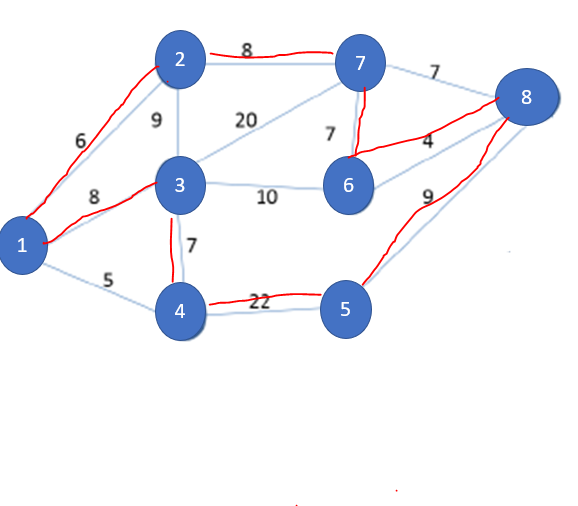